In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings


In [214]:
warnings.filterwarnings('ignore')

### 1. Understand the dataset:

In [215]:
Service_311_request_df = pd.read_csv("/Users/ahmetokur/Desktop/311_Service_Requests_from_2010_to_Present.csv")

In [222]:
Service_311_request_df.head(20)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,01/01/2016 01:50:11 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,12/31/2015 11:55:32 PM,01/01/2016 01:53:54 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,12/31/2015 11:54:05 PM,01/01/2016 01:42:54 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,12/31/2015 11:53:58 PM,01/01/2016 08:27:32 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,12/31/2015 11:53:58 PM,01/01/2016 01:17:40 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


#### Identify the shape of the dataset

In [119]:
Service_311_request_df.shape

(364558, 53)

#### Identify variables with null values

In [223]:
Service_311_request_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

### 2. Perform basic data exploratory analysis:

#### Utilize missing value treatment

In [166]:
Service_311_request_df.replace(np.nan, 'Not Mentioned', inplace=True)

#### Analyze the date column and remove the entries if it has an incorrect timeline

In [224]:
Service_311_request_df['Created Date'] = pd.to_datetime(Service_311_request_df['Created Date'])
Service_311_request_df['Closed Date'] = pd.to_datetime(Service_311_request_df['Closed Date'])

In [225]:
Service_311_request_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [226]:
Service_311_request_df.dropna(subset=['Closed Date'], inplace=True)

In [227]:
Service_311_request_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                            0
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6496
Location Type                        130
Incident Zip                         675
Incident Address                   51686
Street Name                        51686
Cross Street 1                     55331
Cross Street 2                     55464
Intersection Street 1             311549
Intersection Street 2             311673
Address Type                         929
City                                 674
Landmark                          361802
Facility Type                         18
Status                                 0
Due Date                               1
Resolution Description                 0
Resolution Action Updated Date        39
Community Board                        0
Borough         

#### Draw a frequency plot for city-wise complaints

In [172]:
Service_311_request_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [ ]:
Service_311_request_df['City'].unique()

<AxesSubplot:xlabel='City'>

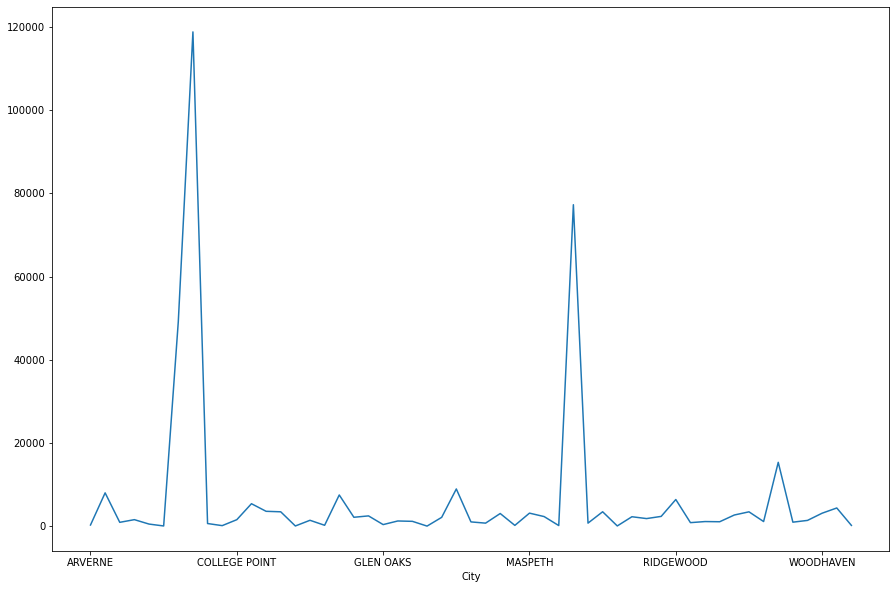

In [228]:
Service_311_request_df.groupby(['City']).size().plot(figsize = (15,10))

#### Draw scatter and hexbin plots for complaint concentration across Brooklyn

#### Scatter Plot between Street Name and Complaint Type

In [ ]:
Complaints_in_Brooklyn = Service_311_request_df[Service_311_request_df['City'] == 'BROOKLYN']

In [ ]:
Complaints_in_Brooklyn

<AxesSubplot:title={'center':'Scatter plot between Complaint Type and Street Name'}, xlabel='Street Name', ylabel='Complaint Type'>

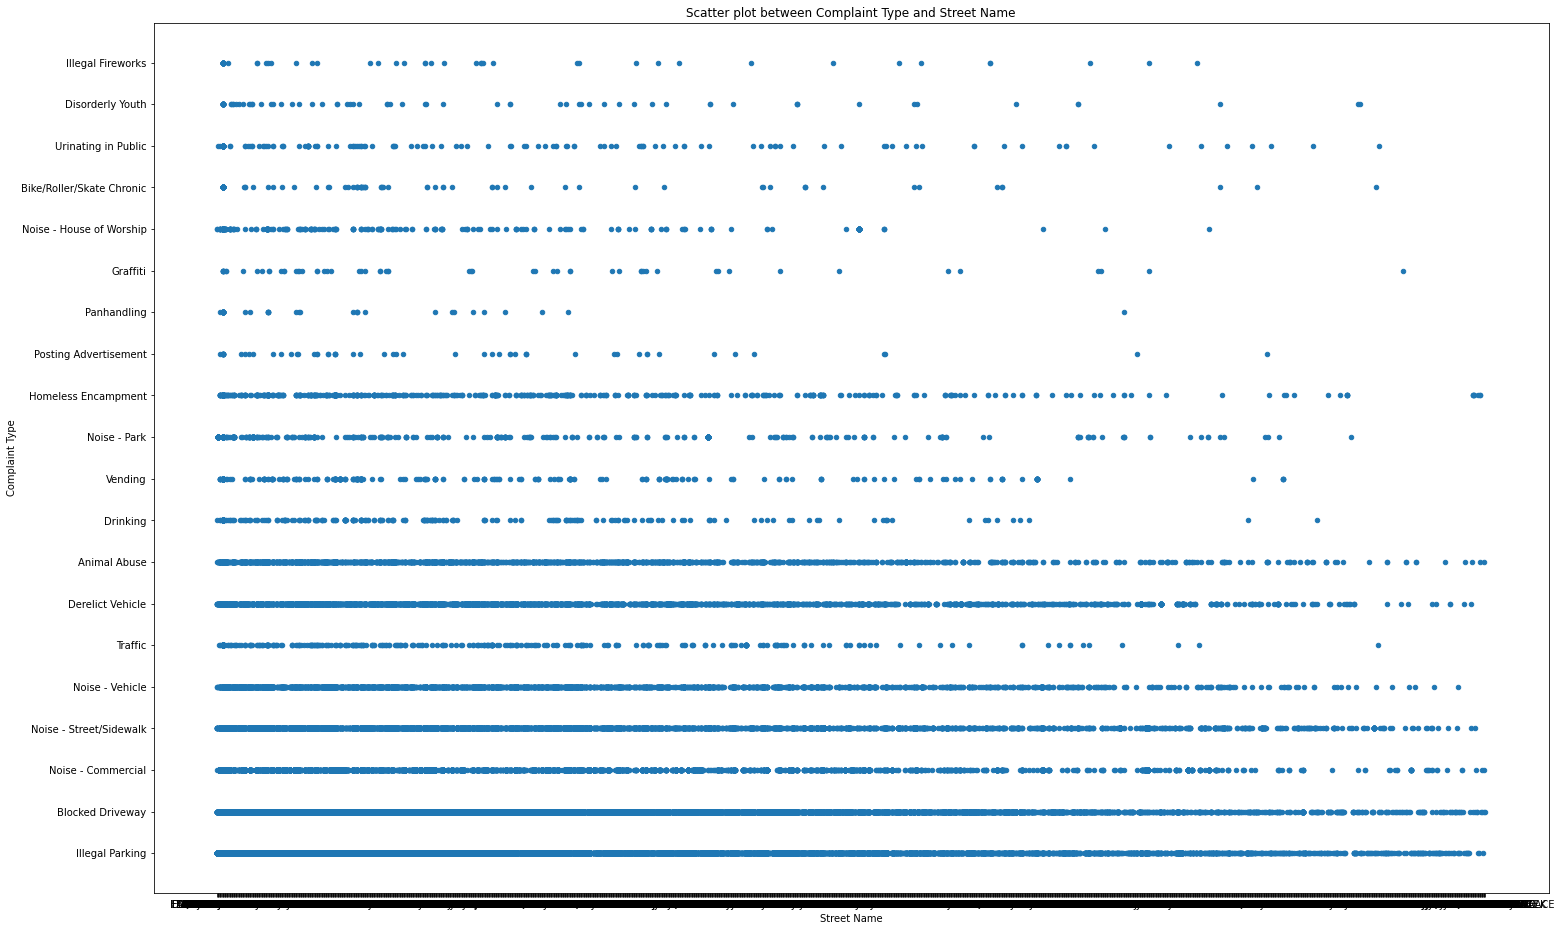

In [135]:
Complaints_in_Brooklyn.plot.scatter(x='Street Name', y= 'Complaint Type',
                                    title= "Scatter plot between Complaint Type and Street Name",figsize = (25,16))


In [145]:
Complaints_in_Brooklyn.dtypes

Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                               object
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Intersection Street 1                      object
Intersection Street 2                      object
Address Type                               object
City                                       object
Landmark                                   object
Facility Type                              object
Status                                     object


#### Hexbin Plot between Street Name and Complaint Type

In [231]:
# To be able to draw a hexbin plot converting catagorical values to numerical values
from sklearn.preprocessing import LabelEncoder


In [232]:
le = LabelEncoder()
le.fit(Complaints_in_Brooklyn['Street Name'].drop_duplicates())


LabelEncoder()

In [233]:
Complaints_in_Brooklyn['Street Name'] = le.transform(Complaints_in_Brooklyn['Street Name'])


In [236]:
le.fit(Complaints_in_Brooklyn['Complaint Type'].drop_duplicates())

LabelEncoder()

In [237]:
Complaints_in_Brooklyn['Complaint Type'] = le.transform(Complaints_in_Brooklyn['Complaint Type'])

<AxesSubplot:xlabel='Complaint Type', ylabel='Street Name'>

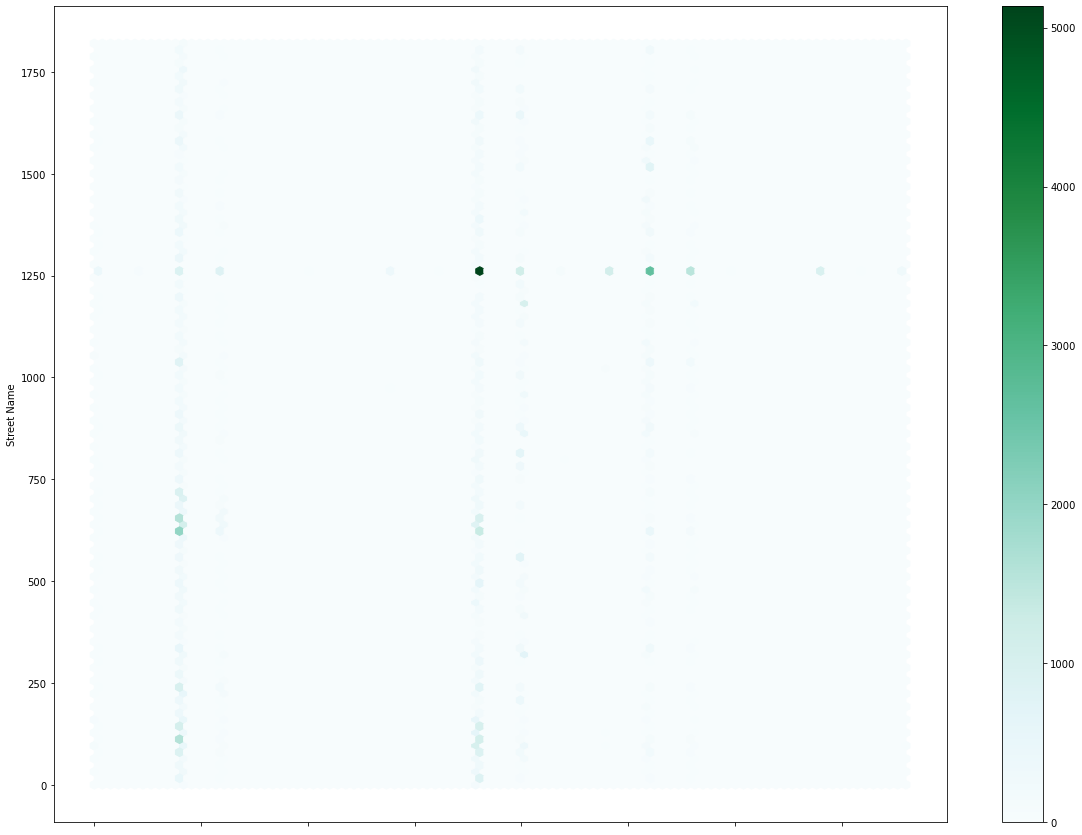

In [238]:
Complaints_in_Brooklyn.plot(kind = 'hexbin', x = 'Complaint Type', y = 'Street Name',figsize=(20,15))

###  Find major types of complaints:

#### Plot a bar graph of count vs. complaint types

<AxesSubplot:xlabel='Complaint Type'>

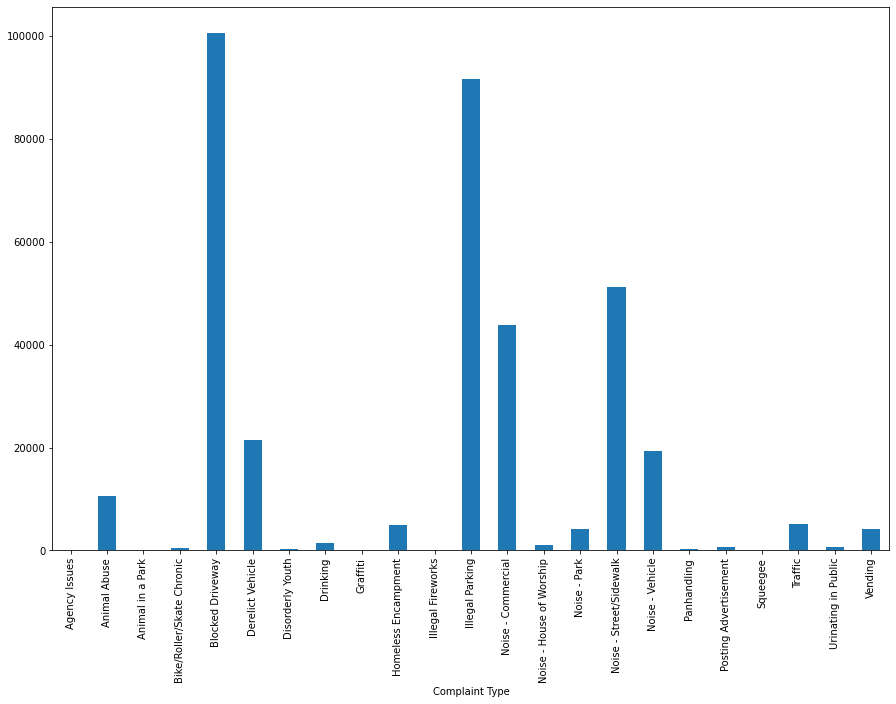

In [239]:
Service_311_request_df.groupby(['Complaint Type']).size().plot(figsize = (15,10), kind='bar')

#### Find the top 10 types of complaints



In [240]:
Service_311_request_df.groupby(['Complaint Type']).size().sort_values(ascending=False)[:10]

Complaint Type
Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
dtype: int64

#### Display the types of complaints in each city in a separate dataset

 

In [241]:
Complaints_by_city = pd.pivot_table(Service_311_request_df, index=['City',"Complaint Type"], 
               values='Unique Key', aggfunc=np.count_nonzero)

In [242]:
Complaints_by_city

Unique Key
City     Complaint Type                     
ARVERNE  Animal Abuse                     46
         Blocked Driveway                 50
         Derelict Vehicle                 32
         Disorderly Youth                  2
         Drinking                          1
...                                      ...
Woodside Blocked Driveway                 27
         Derelict Vehicle                  8
         Illegal Parking                 124
         Noise - Commercial                2
         Noise - Street/Sidewalk           5

[777 rows x 1 columns]

### 4. Visualize the major types of complaints in each city

<AxesSubplot:xlabel='City,Complaint Type'>

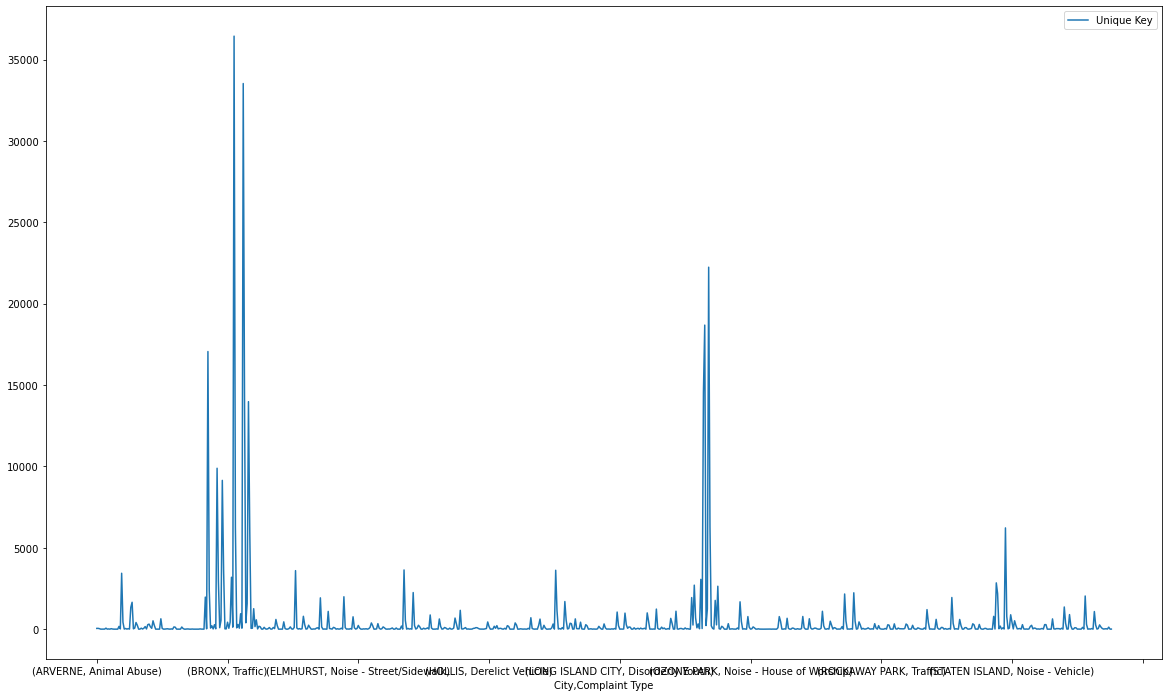

In [243]:
Complaints_by_city.plot(figsize=(20,12))

### 5. Check if the average response time across various types of complaints

In [244]:
Service_311_request_df['Response time'] = Service_311_request_df['Closed Date'] - Service_311_request_df['Created Date']

In [90]:
pd.pivot_table(Service_311_request_df, index=["Complaint Type"], values='Response time')

,Response time
Complaint Type,
Agency Issues,0 days 05:04:49.125000
Animal Abuse,0 days 05:00:32.556030389
Animal in a Park,14 days 00:50:34
Bike/Roller/Skate Chronic,0 days 03:38:43.688421052
Blocked Driveway,0 days 04:30:32.521515741
Derelict Vehicle,0 days 07:02:39.600102239
Disorderly Youth,0 days 03:26:03.749206349
Drinking,0 days 03:50:21.300569800
Graffiti,0 days 06:27:56.343949044
